In [2]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 3 & tutorial name: reactive-silicon-dioxide
figures will be saved in /docs/sphinx/source/tutorials/figures/level3/reactive-silicon-dioxide/


In [4]:
log = lammps_logfile.File("log.lammps")
step = log.get("Step")
qSi = log.get("v_qSi")
qO = log.get("v_qO")
Volume = log.get("Volume")
timestep = 0.5
time = step*timestep

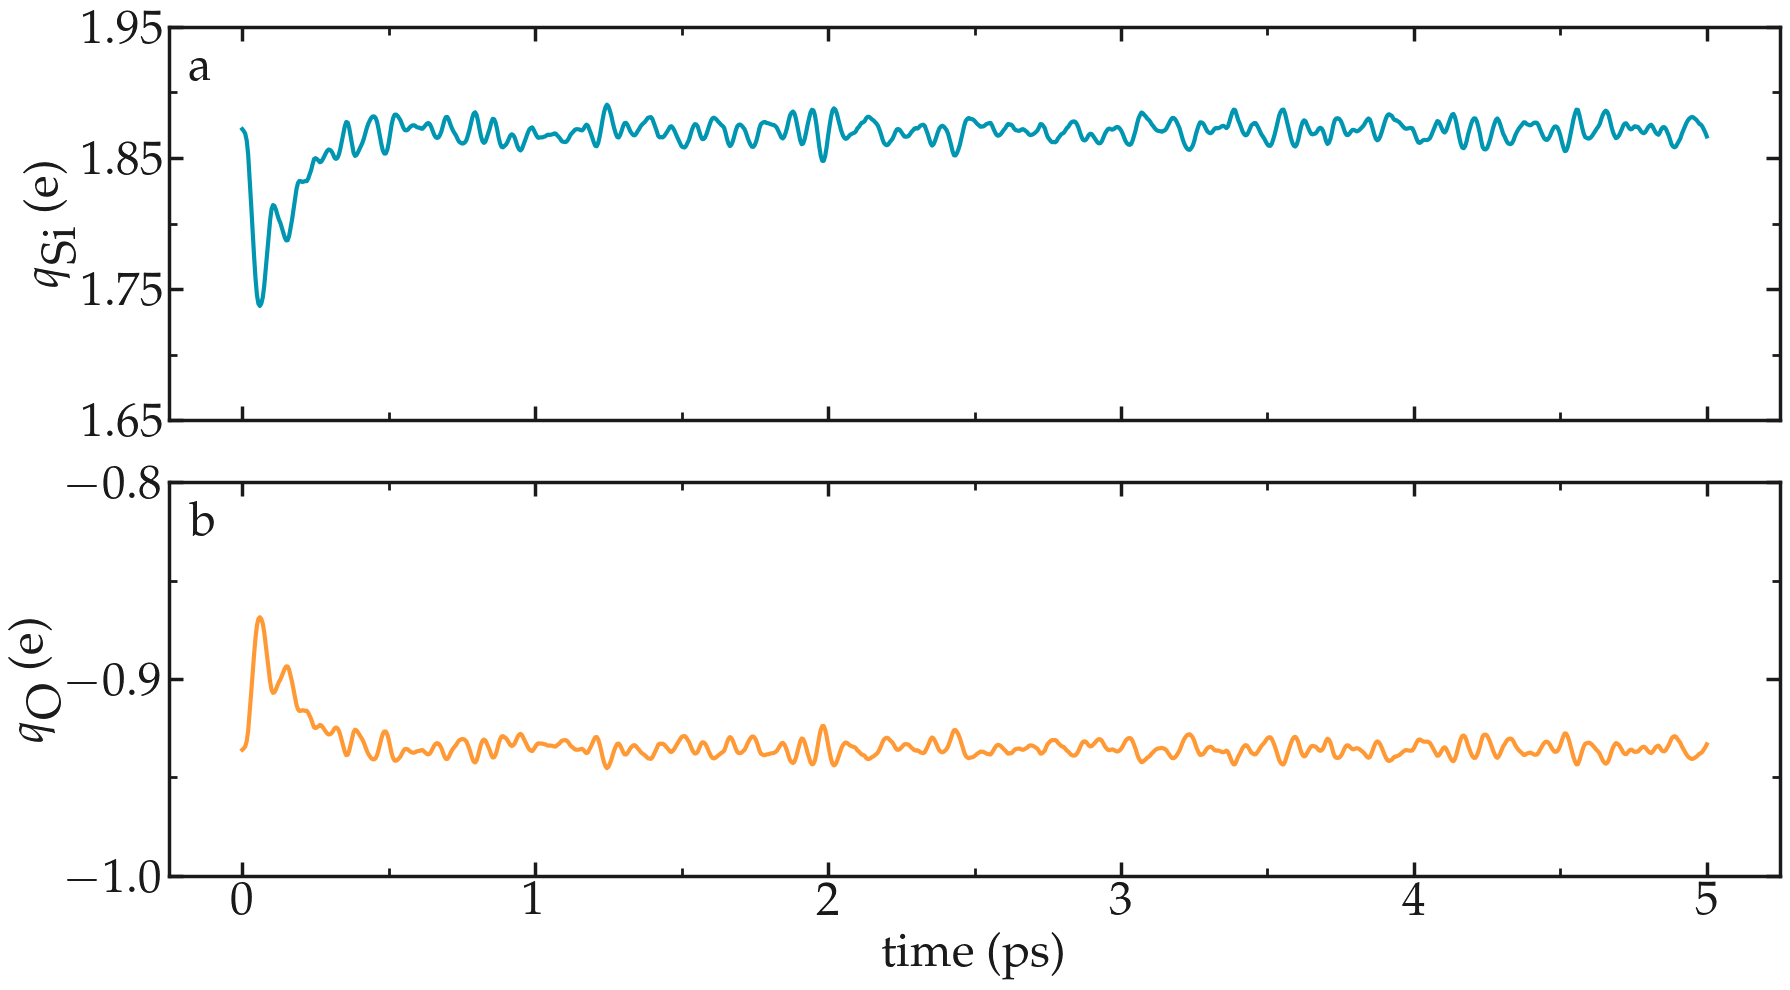

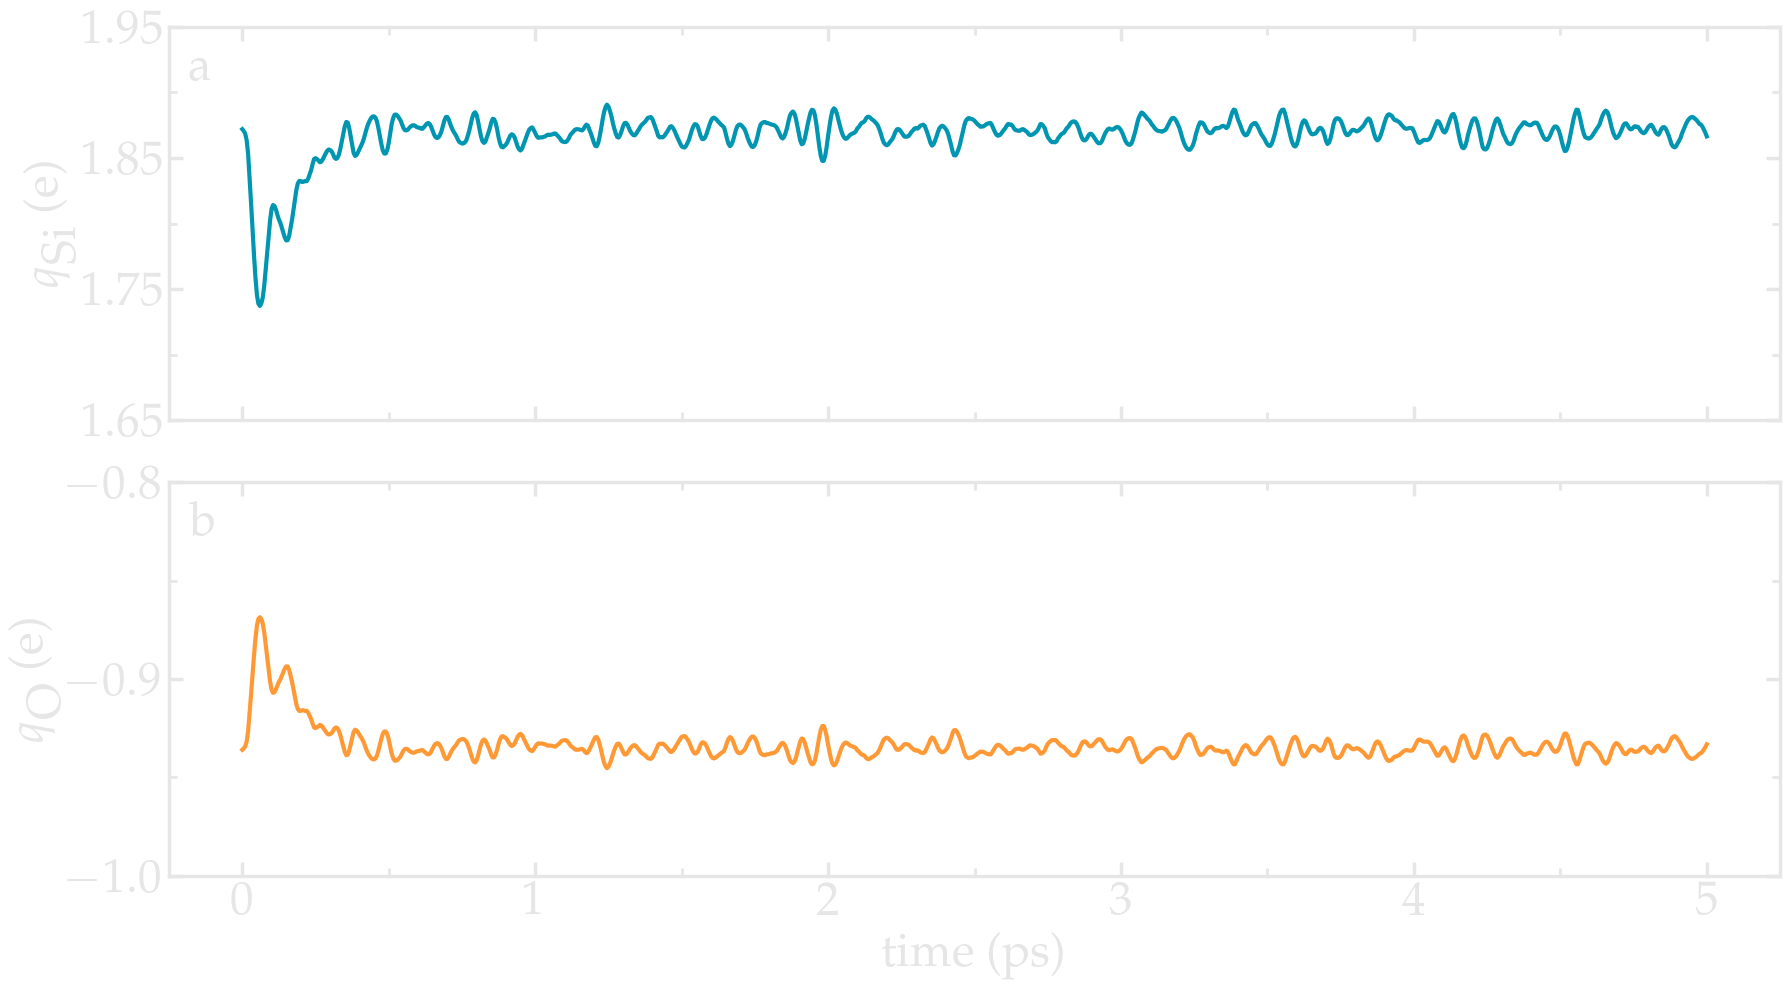

In [5]:
filename = "average-charge"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,10))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time/1000, qSi, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], None, r'$q_\textrm{Si}$ (e)', legend=False, axis_color=mygray)
    set_boundaries(plt, y_ticks=np.arange(1.65, 2, 0.1))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time/1000, qO, color=colors["myorange"], linewidth=3)
    complete_panel(ax[-1], r'time (ps)', r'$q_\textrm{O}$ (e)', legend=False, axis_color=mygray)
    set_boundaries(plt, y_ticks=np.arange(-1, -0.75, 0.1))
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

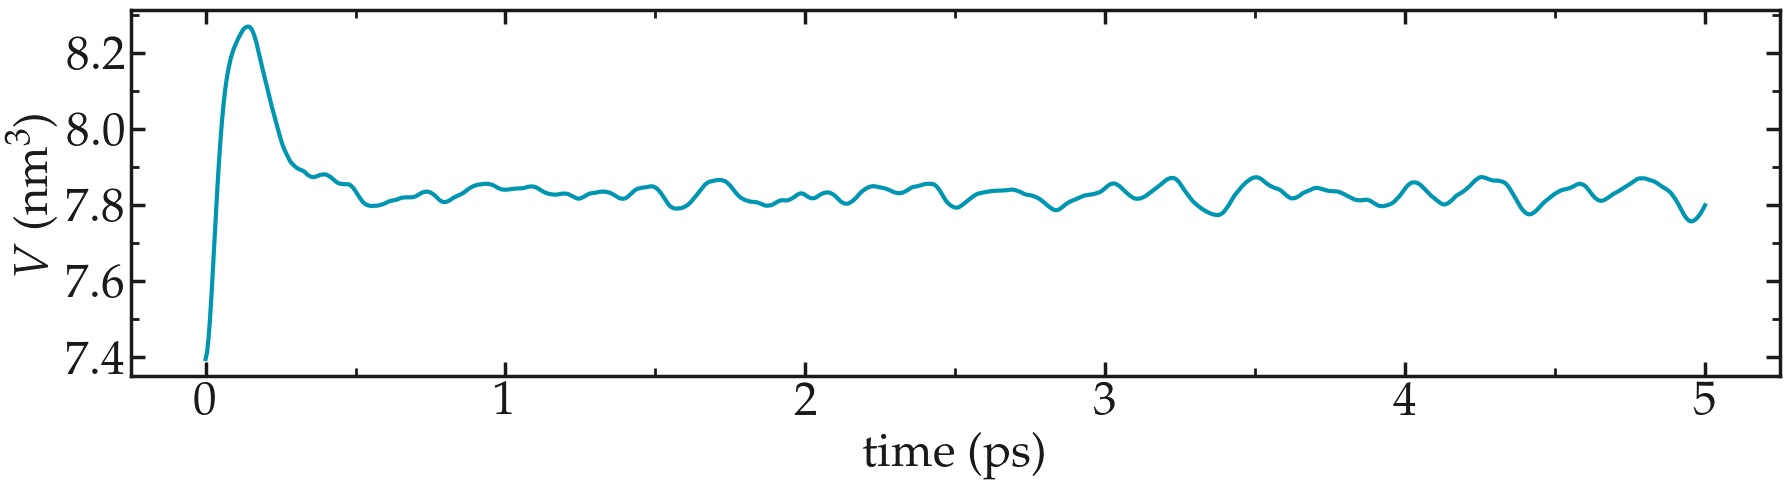

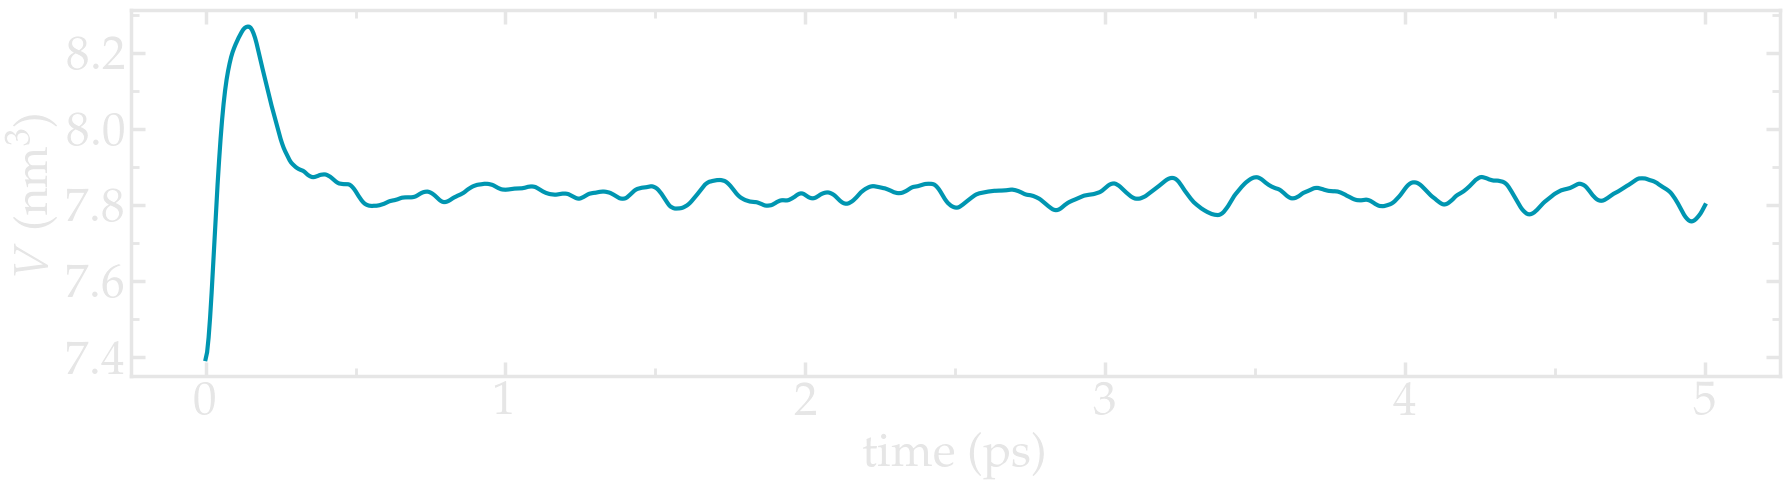

In [7]:
filename = "volume"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,5))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time/1000, Volume/1000, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], r'time (ps)', r'$V$ (nm$^3$)', legend=False, axis_color=mygray)
    #set_boundaries(plt, y_ticks=np.arange(1.5, 1.93, 0.1))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)